# MATH 336 Paper -- Metropolis-Hastings Simulation 

## This program aims to work through an example to compute the expected value (or mean) of an unknown distribution, using the Metropolis-Hastings algorithm

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [3]:
# The proportional function that we will be taking values from

def f(x):
    return np.exp(-x * (x + 1) * (x - 1)**2)

In [4]:
# The general form of g(x), the Gaussian jumping distribution
def g(x, mu, sigma):
    return 1/np.sqrt(2*np.pi)/sigma * np.exp(-0.5*((x-mu)/sigma)**2)

# Draw Target Distribution

In [5]:
NORM_FACTOR = 2.99368023616 # This is the integral of our proportional function
# Since integral of pdf = 1, norm factor is just integral of our scaled function

Text(0, 0.5, 'f(x)')

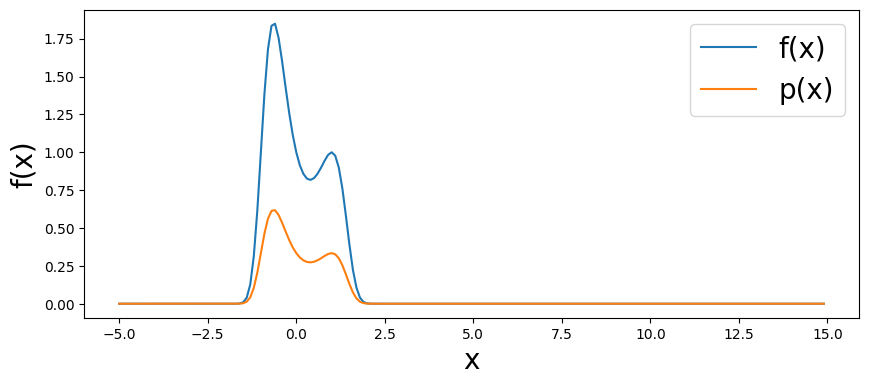

In [6]:
x_vals = np.arange(-5,15,.1)
f_vals = [f(x) for x in x_vals]
p_vals = [f / NORM_FACTOR for f in f_vals]

plt.figure(figsize=(10,4))
plt.plot(x_vals, f_vals)
plt.plot(x_vals, p_vals)
plt.legend(['f(x)', 'p(x)'], fontsize=20)
plt.xlabel('x', fontsize=20)
plt.ylabel('f(x)', fontsize=20)

In [7]:
# 0.0643854004627436 is the expected value of pdf function f(x)
TRUE_EXP = 0.0643854004627436 / NORM_FACTOR
TRUE_EXP

0.021507106766129068

# Method 1: Accept/Reject Sampling

Text(0.5, 1.0, 'M=200')

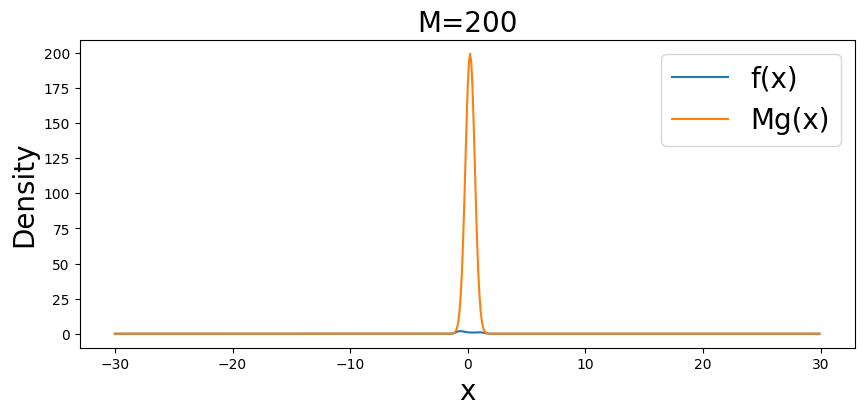

In [8]:
x_vals = np.arange(-30,30,.1)
f_vals = [f(x) for x in x_vals]
g_vals = g(x_vals, 0.2, 0.4)
M = 200

plt.figure(figsize=(10,4))
plt.plot(x_vals, f_vals)
plt.plot(x_vals, M*g_vals)
plt.xlabel('x', fontsize=20)
plt.ylabel('Density', fontsize=20)
plt.legend(['f(x)', 'Mg(x)'], fontsize=20)

plt.title("M=%s"%M, fontsize=20)

(0.0, 2.5)

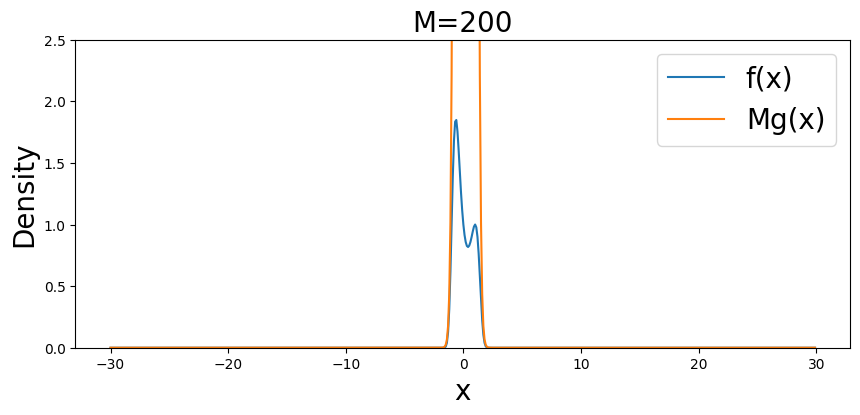

In [9]:
M = 200

plt.figure(figsize=(10,4))
plt.plot(x_vals, f_vals)
plt.plot(x_vals, M*g_vals)
plt.xlabel('x', fontsize=20)
plt.ylabel('Density', fontsize=20)
plt.legend(['f(x)', 'Mg(x)'], fontsize=20)

plt.title("M=%s"%M, fontsize=20)

plt.ylim(0,2.5)

In [14]:
#collect all accepted samples here
samples = []

#try this many candidates
N = 100000

for _ in range(N):
    #sample a candidate
    candidate = np.random.normal(0.2, 0.4)
    
    #calculate probability of accepting this candidate
    prob_accept = f(candidate) / (M*g(candidate, 0.2, 0.4))
    
    #accept with the calculated probability
    if np.random.random() < prob_accept:
        samples.append(candidate)

In [15]:
print("Num Samples Collected: %s"%len(samples))

Num Samples Collected: 1545


In [16]:
print("Efficiency: %s"%round(len(samples) / N, 3))

Efficiency: 0.015


Text(0.5, 1.0, 'Empirical Exp. Value: 0.01837\nTrue Exp. Value: 0.02151')

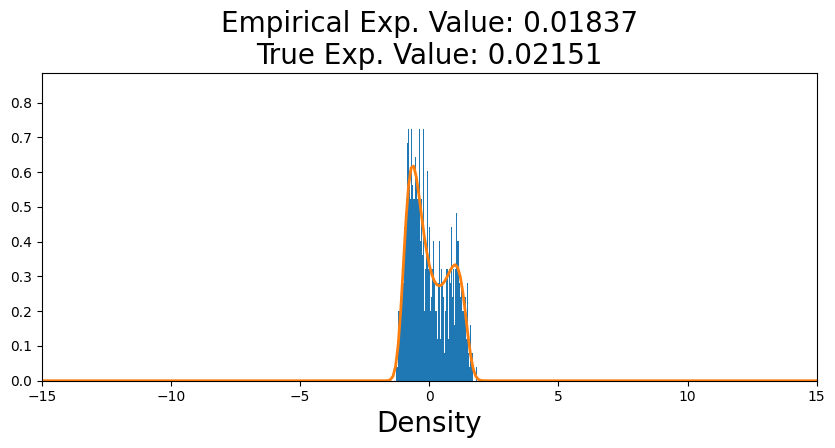

In [17]:
plt.figure(figsize=(10,4))
plt.hist(samples, bins=200, density=True)
plt.xlabel('x', fontsize=20)
plt.xlabel('Density', fontsize=20)
plt.plot(x_vals, [f/NORM_FACTOR for f in f_vals], linewidth=2)
plt.xlim(-15,15)

plt.title('Empirical Exp. Value: %s\nTrue Exp. Value: %s'%(round(np.mean(samples), 5), round(np.mean(TRUE_EXP), 5)), fontsize=20)

Text(0.5, 1.0, 'Correlation: 0.04')

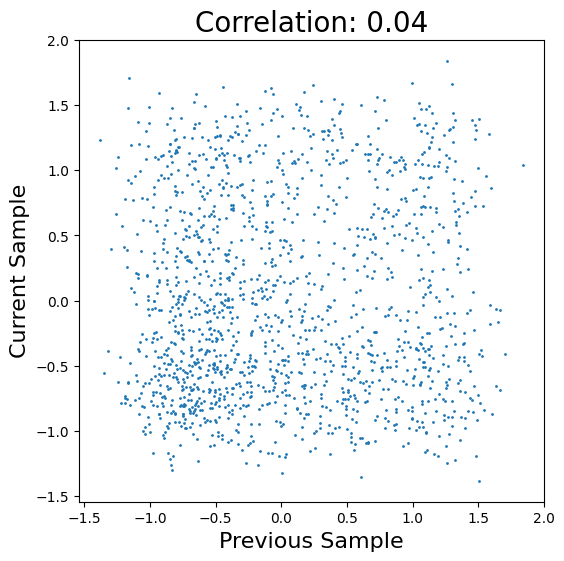

In [18]:
plt.figure(figsize=(6,6))
plt.scatter(samples[:-1], samples[1:], s=1)
plt.xlabel('Previous Sample', fontsize=16)
plt.ylabel('Current Sample', fontsize=16)
corr = round(pearsonr(samples[:-1], samples[1:])[0], 2)
plt.title('Correlation: %s'%corr, fontsize=20)

# Method 2: Metropolis-Hastings Algorithm, N(x_previous, 0.4)

In [19]:
samples = [1]
num_accept = 0
for _ in range(N):
    #sample candidate from normal distribution
    candidate = np.random.normal(samples[-1], 0.4)
    
    #calculate probability of accepting this candidate
    prob = min(1, f(candidate) / f(samples[-1]))
    
    #accept with the calculated probability
    if np.random.random() < prob:
        samples.append(candidate)
        num_accept += 1
        
    #otherwise report current sample again
    else:
        samples.append(samples[-1])

In [20]:
burn_in = 1000
retained_samples = samples[burn_in+1:]

In [21]:
print("Num Samples Collected: %s"%len(retained_samples))

Num Samples Collected: 99000


In [22]:
print("Efficiency: %s"%round(len(retained_samples) / N, 3))

Efficiency: 0.99


In [23]:
print("Fraction Acceptances: %s"%(num_accept / N))

Fraction Acceptances: 0.80634


Text(0.5, 1.0, 'Empirical Exp. Value: 0.02841\nTrue Exp. Value: 0.02151')

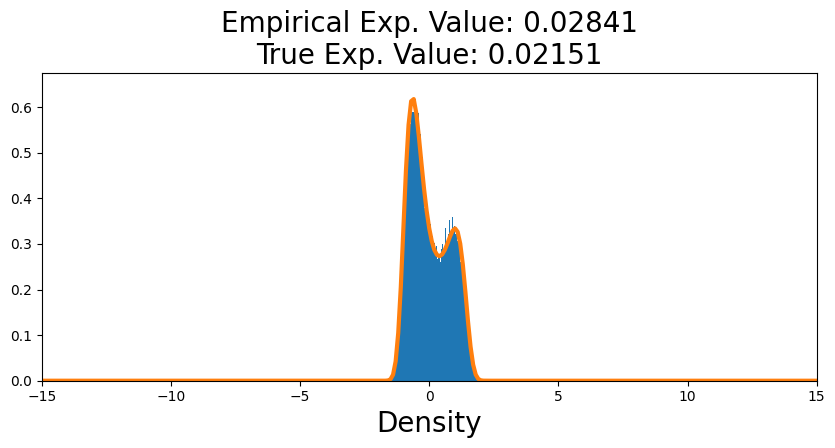

In [25]:
plt.figure(figsize=(10,4))
plt.hist(retained_samples, bins=200, density=True)
plt.xlabel('x', fontsize=20)
plt.xlabel('Density', fontsize=20)
plt.plot(x_vals, [f/NORM_FACTOR for f in f_vals], linewidth=3)
plt.xlim(-15,15)

plt.title('Empirical Exp. Value: %s\nTrue Exp. Value: %s'%(round(np.mean(retained_samples), 5), round(np.mean(TRUE_EXP), 5)), fontsize=20)

Text(0.5, 1.0, 'Correlation: 0.91')

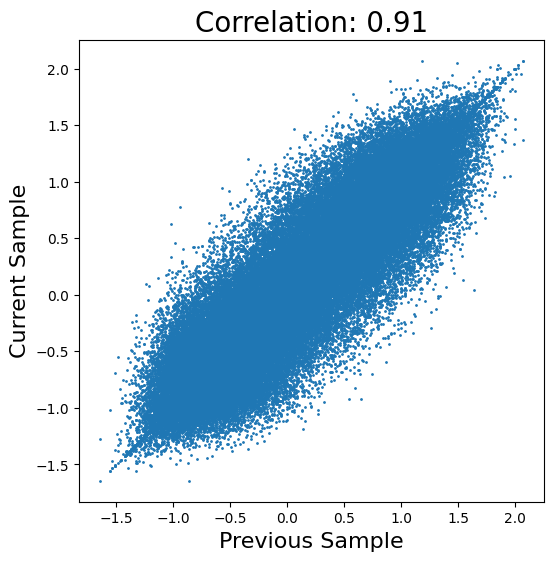

In [26]:
plt.figure(figsize=(6,6))
plt.scatter(retained_samples[:-1], retained_samples[1:], s=1)
plt.xlabel('Previous Sample', fontsize=16)
plt.ylabel('Current Sample', fontsize=16)
corr = round(pearsonr(samples[:-1], samples[1:])[0], 2)
plt.title('Correlation: %s'%corr, fontsize=20)